In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from acquire import get_cohort_data, get_cohort_information_data
from prepare import split_by_program
from wrangle import wrangle_cohort_data

import warnings
warnings.filterwarnings("ignore")

**Definitions**
- php - PHP Full Stack Web Development
- java - Java Full Stack Web Development
- ds - Data Science
- fe - Front End Web Development

## Acquire

In [2]:
# Created an acquire.py file that runs a SQL query to join the databases from the codeup library, and created a
# pandas dataframe with that query, after that I saved it to a csv, and have to function check for the csv.
df = get_cohort_data()

In [3]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2.0,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847330 entries, 0 to 847329
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        847330 non-null  object 
 1   time        847330 non-null  object 
 2   path        847329 non-null  object 
 3   user_id     847330 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          847330 non-null  object 
 6   id          72405 non-null   float64
 7   name        72405 non-null   object 
 8   slack       72405 non-null   object 
 9   start_date  72405 non-null   object 
 10  end_date    72405 non-null   object 
 11  created_at  72405 non-null   object 
 12  updated_at  72405 non-null   object 
 13  deleted_at  0 non-null       float64
 14  program_id  72405 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory usage: 103.4+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,847330.0,456.707344,250.734201,1.0,263.0,476.0,648.0,981.0
cohort_id,847330.0,48.501049,32.795482,1.0,28.0,33.0,57.0,139.0
id,72405.0,30.015248,35.619910,1.0,11.0,12.0,53.0,139.0
deleted_at,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program_id,72405.0,1.552876,0.662231,1.0,1.0,1.0,2.0,4.0


In [6]:
df.isnull().sum()

date               0
time               0
path               1
user_id            0
cohort_id          0
ip                 0
id            774925
name          774925
slack         774925
start_date    774925
end_date      774925
created_at    774925
updated_at    774925
deleted_at    847330
program_id    774925
dtype: int64

In [7]:
df.shape

(847330, 15)

In [8]:
df_info = get_cohort_information_data()

In [9]:
df_info.head()

,name,start_date,end_date,program_id
cohort_id,,,,
1,Arches,2014-02-04,2014-04-22,1
2,Badlands,2014-06-04,2014-08-22,1
3,Carlsbad,2014-09-04,2014-11-05,1
4,Denali,2014-10-20,2015-01-18,1
5,Everglades,2014-11-18,2015-02-24,1


In [10]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 139
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        52 non-null     object
 1   start_date  52 non-null     object
 2   end_date    52 non-null     object
 3   program_id  52 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.0+ KB


In [11]:
df_info.describe().T

,count,mean,std,min,25%,50%,75%,max
program_id,52.0,1.923077,0.736876,1.0,1.0,2.0,2.0,4.0


In [12]:
df_info.isnull().sum()

name          0
start_date    0
end_date      0
program_id    0
dtype: int64

In [13]:
df_info.shape

(52, 4)

## Prepare

**Prepare summary**

##### List of things my clean_cohort_data function does.
- Combined the date and time column into a datetime, and converted the datatype to datetime.
- Placed my new datetime column to the index for later use.
- Replaced the program_id with its corresponding program name and subdomain.
- Dropped unnecessary columns 'date','time','deleted_at','program_id','id'.
- Renamed 'name' to 'cohort_name' for my personal readability.
- Created a dictionary to map cohort name to cohort id.
- Filled nulls in cohort_id.

## Wrangle

**Size before wrangle - (847330, 15),(52, 4)**

**Size after wrangle - (847329, 12)**

**This is the cleaned dataframe and will be used to answer the questions given in the email by zach**

In [14]:
df,df_without_staff = wrangle_cohort_data()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 801475 entries, 2018-01-26 09:56:02 to 2021-04-21 12:32:01
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   path               801475 non-null  object
 1   user_id            801475 non-null  int64 
 2   cohort_id          801475 non-null  int64 
 3   ip                 801475 non-null  object
 4   cohort_name        801475 non-null  object
 5   start_date         801475 non-null  object
 6   end_date           801475 non-null  object
 7   program_id         801475 non-null  int64 
 8   count_helper       801475 non-null  int64 
 9   program_name       801475 non-null  object
 10  program_subdomain  801475 non-null  object
 11  slack              801475 non-null  object
 12  module/lesson      655942 non-null  object
dtypes: int64(4), object(9)
memory usage: 85.6+ MB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,801475.0,457.292479,249.980598,1.0,264.0,476.0,648.0,981.0
cohort_id,801475.0,48.558252,32.833081,1.0,28.0,33.0,57.0,139.0
program_id,801475.0,2.082590,0.384466,1.0,2.0,2.0,2.0,4.0
count_helper,801475.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [17]:
df.isnull().sum()

path                      0
user_id                   0
cohort_id                 0
ip                        0
cohort_name               0
start_date                0
end_date                  0
program_id                0
count_helper              0
program_name              0
program_subdomain         0
slack                     0
module/lesson        145533
dtype: int64

In [18]:
df.shape

(801475, 13)

In [19]:
df.head()

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,count_helper,program_name,program_subdomain,slack,module/lesson
datetime,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,1,PHP Full Stack Web Development,php,#hampton,NaN
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,1,PHP Full Stack Web Development,php,#hampton,java-ii/object-oriented-programming
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,1,PHP Full Stack Web Development,php,#hampton,slides/object_oriented_programming
2018-01-26 10:40:15,javascript-i/functions,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,1,PHP Full Stack Web Development,php,#hampton,javascript-i/functions
2018-01-26 11:26:13,java-i,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,1,PHP Full Stack Web Development,php,#hampton,NaN


In [127]:
df.program_name.unique()

array(['PHP Full Stack Web Development',
       'Java Full Stack Web Development', 'Front End Web Development',
       'Data Science'], dtype=object)

### Zach's questions in the email:

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

Lets break down the 4 programs and find the lesson for each program that is most consistently at the top.

In [20]:
php_df,java_df,ds_df,fe_df = split_by_program(df)

In [21]:
php_df.groupby('cohort_name')['path','user_id'].nunique()

,path,user_id
cohort_name,,
Arches,341,18
Badlands,43,3
Denali,3,1
Franklin,44,2
Glacier,142,6
Hampton,277,5
Ike,94,5
Joshua,116,5
Kings,347,9


<AxesSubplot:xlabel='cohort_name'>

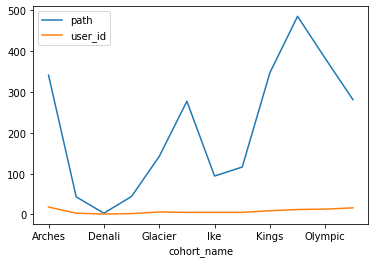

In [22]:
php_df.groupby('cohort_name')['path','user_id'].nunique().plot()

In [23]:
java_df.groupby('cohort_name')['path','user_id'].nunique()

,path,user_id
cohort_name,,
Andromeda,365,28
Apex,272,24
Bash,274,23
Betelgeuse,333,21
Ceres,300,29
Deimos,287,27
Europa,266,28
Fortuna,257,29
Ganymede,295,28


<AxesSubplot:xlabel='cohort_name'>

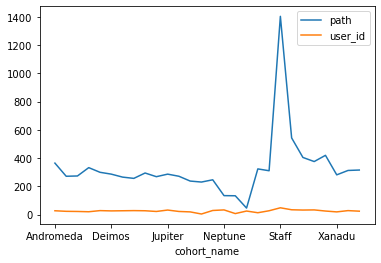

In [24]:
java_df.groupby('cohort_name')['path','user_id'].nunique().plot()

In [25]:
ds_df.groupby('cohort_name')['path','user_id'].nunique()

,path,user_id
cohort_name,,
Bayes,532,23
Curie,417,21
Darden,419,29
Easley,229,17
Florence,161,21


<AxesSubplot:xlabel='cohort_name'>

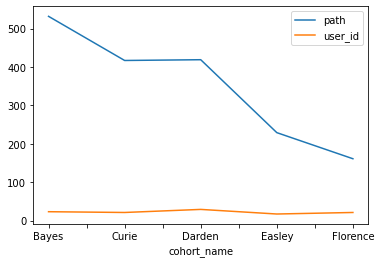

In [26]:
ds_df.groupby('cohort_name')['path','user_id'].nunique().plot()

In [27]:
fe_df

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,count_helper,program_name,program_subdomain,slack,module/lesson
datetime,,,,,,,,,,,,,
2018-03-22 19:01:54,content/html-css,152,9,207.68.209.17,Apollo,2015-03-30,2015-07-29,4,1,Front End Web Development,fe,#apollo,content/html-css
2018-03-22 19:01:54,content/html-css/gitbook/images/favicon.ico,152,9,207.68.209.17,Apollo,2015-03-30,2015-07-29,4,1,Front End Web Development,fe,#apollo,content/html-css
2018-03-22 19:02:47,content/html-css,152,9,207.68.209.17,Apollo,2015-03-30,2015-07-29,4,1,Front End Web Development,fe,#apollo,content/html-css
2018-03-22 19:02:52,content/html-css/introduction.html,152,9,207.68.209.17,Apollo,2015-03-30,2015-07-29,4,1,Front End Web Development,fe,#apollo,content/html-css


In [28]:
fe_df.groupby('cohort_name')['path','user_id'].nunique()

,path,user_id
cohort_name,,
Apollo,3,1


<AxesSubplot:xlabel='cohort_name'>

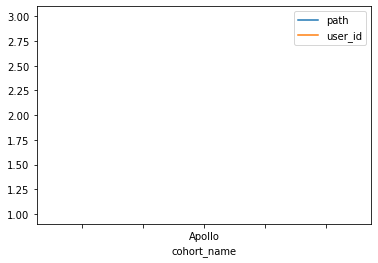

In [29]:
fe_df.groupby('cohort_name')['path','user_id'].nunique().plot()

In [30]:
php_df.cohort_name.value_counts().sum()

28867

In [123]:
php_df.groupby(['module/lesson','cohort_name']).path.count().idxmax()

('spring/fundamentals', 'Lassen')

In [31]:
java_df.cohort_name.value_counts().sum()

677551

In [32]:
ds_df.cohort_name.value_counts().sum()

95053

In [122]:
ds_df.groupby(['module/lesson','cohort_name']).path.count().idxmax()

('classification/overview', 'Darden')

In [33]:
fe_df.cohort_name.value_counts().sum()

4

In [34]:
java_df.groupby('cohort_name')['path'].count()

cohort_name
Andromeda     24185
Apex          32222
Bash          16941
Betelgeuse    28401
Ceres         39077
Deimos        31421
Europa        26738
Fortuna       34864
Ganymede      32117
Hyperion      28490
Jupiter       35413
Kalypso       22752
Luna          16132
Mammoth         658
Marco         15698
Neptune        6804
Niagara         718
Oberon         1541
Pinnacles      2009
Sequoia        6814
Staff         77691
Teddy         29098
Ulysses       26893
Voyageurs     33535
Wrangell      24454
Xanadu        26825
Yosemite      19762
Zion          36298
Name: path, dtype: int64

In [111]:
Ceres_df = java_df[java_df.cohort_name == 'Ceres']
Ceres_df.groupby(['module/lesson']).path.count().idxmax()

'html-css/css-i'

In [112]:
Fortuna_df = java_df[java_df.cohort_name == 'Fortuna']
Fortuna_df.groupby(['module/lesson']).path.count().idxmax()

'html-css/css-i'

In [113]:
Voyageurs_df = java_df[java_df.cohort_name == 'Voyageurs']
Voyageurs_df.groupby(['module/lesson']).path.count().idxmax()

'spring/fundamentals'

In [114]:
Hyperion_df = java_df[java_df.cohort_name == 'Hyperion']
Hyperion_df.groupby(['module/lesson']).path.count().idxmax()

'html-css/css-i'

In [115]:
Teddy_df = java_df[java_df.cohort_name == 'Teddy']
Teddy_df.groupby(['module/lesson']).path.count().idxmax()

'spring/fundamentals'

In [116]:
Ulysses_df = java_df[java_df.cohort_name == 'Ulysses']
Ulysses_df.groupby(['module/lesson']).path.count().idxmax()

'spring/fundamentals'

In [117]:
Xanadu_df = java_df[java_df.cohort_name == 'Xanadu']
Xanadu_df.groupby(['module/lesson']).path.count().idxmax()

'spring/fundamentals'

In [118]:
Ganymede_df = java_df[java_df.cohort_name == 'Teddy']
Ganymede_df.groupby(['module/lesson']).path.count().idxmax()

'spring/fundamentals'

In [119]:
java_df.groupby(['module/lesson','cohort_name']).path.count().idxmax()

('spring/fundamentals', 'Staff')

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

Lets continue with the 4 programs and search for lessons that seem to overlap among a majority of the cohorts but not all.

In [177]:
Ceres_df.groupby(['module/lesson']).count_helper.agg(['count']).sort_values(by = 'count',ascending = False).head(10)

,count
module/lesson,
html-css/css-i,2898
spring/fundamentals,1624
javascript-i/introduction,1451
search/search_index.json,1380
html-css/css-ii,1119
javascript-i/bom-and-dom,972
javascript-i/arrays,757
jquery/events,710
jquery/ajax,620


In [178]:
Ganymede_df.groupby(['module/lesson']).count_helper.agg(['count']).sort_values(by = 'count',ascending = False).head(10)

,count
module/lesson,
spring/fundamentals,1948
javascript-i/bom-and-dom,629
mkdocs/search_index.json,595
mysql/relationships,574
javascript-i/introduction,521
javascript-i/arrays,515
jquery/ajax,472
mysql/clauses,448
spring/extra-features,395


In [179]:
Xanadu_df.groupby(['module/lesson']).count_helper.agg(['count']).sort_values(by = 'count',ascending = False).head(10)

,count
module/lesson,
spring/fundamentals,1381
html-css/css-i,968
javascript-i/introduction,911
html-css/css-ii,841
search/search_index.json,577
javascript-i/bom-and-dom,547
jquery/ajax,525
mysql/relationships,501
html-css/elements,438


In [180]:
Teddy_df.groupby(['module/lesson']).count_helper.agg(['count']).sort_values(by = 'count',ascending = False).head(10)

,count
module/lesson,
spring/fundamentals,1948
javascript-i/bom-and-dom,629
mkdocs/search_index.json,595
mysql/relationships,574
javascript-i/introduction,521
javascript-i/arrays,515
jquery/ajax,472
mysql/clauses,448
spring/extra-features,395


In [181]:
Ulysses_df.groupby(['module/lesson']).count_helper.agg(['count']).sort_values(by = 'count',ascending = False).head(10)

,count
module/lesson,
spring/fundamentals,1657
html-css/css-ii,1091
javascript-i/introduction,937
html-css/css-i,835
mkdocs/search_index.json,721
javascript-i/bom-and-dom,509
jquery/ajax,469
javascript-i/arrays,449
mysql/relationships,424


In [182]:
Voyageurs_df.groupby(['module/lesson']).count_helper.agg(['count']).sort_values(by = 'count',ascending = False).head(10)

,count
module/lesson,
spring/fundamentals,1560
html-css/css-ii,1045
javascript-i/introduction,1026
html-css/css-i,901
javascript-i/bom-and-dom,644
mysql/relationships,539
javascript-i/arrays,506
jquery/ajax,496
mysql/clauses,457


In [183]:
Fortuna_df.groupby(['module/lesson']).count_helper.agg(['count']).sort_values(by = 'count',ascending = False).head(10)

,count
module/lesson,
html-css/css-i,1970
spring/fundamentals,1746
javascript-i/introduction,1049
search/search_index.json,1020
html-css/css-ii,821
javascript-i/bom-and-dom,738
mysql/relationships,636
mysql/clauses,619
javascript-i/arrays,537


In [194]:
java_cohort_list = list(set(java_df.cohort_name.to_list()))

In [199]:
for cohort in java_cohort_list:
    temp_df = df[df.cohort_name == cohort]
    print(cohort)
    print('------------------------------------------------------------')
    print(temp_df.groupby(['module/lesson']).count_helper.agg(['count']).sort_values(by = 'count',ascending = False).head(10))
    print('------------------------------------------------------------')

Mammoth
------------------------------------------------------------
                                      count
module/lesson                              
content/php_i                           115
content/php_ii                           90
spring/fundamentals                      34
content/php_iii                          16
appendix/code-standards                  11
javascript-i/bom-and-dom                 10
appendix/extra-challenges                10
java-iii/deployment-and-dependencies      9
mysql/introduction                        9
java-iii/jsp-and-jstl                     9
------------------------------------------------------------
Bash
------------------------------------------------------------
                           count
module/lesson                   
spring/fundamentals         1082
html-css/css-i               730
javascript-i/introduction    703
search/search_index.json     660
html-css/css-ii              496
javascript-i/bom-and-dom     354
javascript-i

Betelgeuse
------------------------------------------------------------
                           count
module/lesson                   
javascript-i/introduction   1222
spring/fundamentals         1100
html-css/css-ii             1090
html-css/css-i               940
search/search_index.json     761
javascript-i/bom-and-dom     725
jquery/ajax                  619
javascript-i/arrays          541
jquery/essential-methods     504
html-css/elements            495
------------------------------------------------------------
Zion
------------------------------------------------------------
                           count
module/lesson                   
spring/fundamentals         2185
html-css/css-i              1297
html-css/css-ii             1263
javascript-i/introduction   1138
javascript-i/bom-and-dom    1003
jquery/events                722
search/search_index.json     700
mysql/relationships          630
jquery/ajax                  624
javascript-i/arrays          532
---------

In [187]:
ds_cohort_list = list(set(ds_df.cohort_name.to_list()))

In [188]:
ds_cohort_list

['Darden', 'Bayes', 'Easley', 'Florence', 'Curie']

In [200]:
for cohort in ds_cohort_list:
    temp_df = df[df.cohort_name == cohort]
    print(cohort)
    print('------------------------------------------------------------')
    print(temp_df.groupby(['module/lesson']).count_helper.agg(['count']).sort_values(by = 'count',ascending = False).head(10))
    print('------------------------------------------------------------')

Darden
------------------------------------------------------------
                                                count
module/lesson                                        
classification/overview                          1109
classification/scale_features_or_not.svg          943
sql/mysql-overview                                774
search/search_index.json                          664
anomaly-detection/AnomalyDetectionCartoon.jpeg    612
anomaly-detection/overview                        592
1-fundamentals/AI-ML-DL-timeline.jpg              470
1-fundamentals/modern-data-scientist.jpg          470
1-fundamentals/1.1-intro-to-data-science          460
stats/compare-means                               423
------------------------------------------------------------
Bayes
------------------------------------------------------------
                                                   count
module/lesson                                           
1-fundamentals/modern-data-scientist.jpg  

### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

Lets group by user id and take the count of paths that they accesed per hour and take the mean to find the least active students.

### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

Lets look at the ip addresses that access over 60 paths an hour ie over 1 per minute, its very unlikely that any student would access that much information in that amount of time.

In [36]:
ip_series = df.resample('h').ip.value_counts()

In [37]:
ip_series

datetime             ip             
2018-01-26 09:00:00  97.105.19.61       10
2018-01-26 10:00:00  97.105.19.61       55
                     71.137.146.71       2
2018-01-26 11:00:00  97.105.19.61       96
2018-01-26 12:00:00  97.105.19.61       19
                                        ..
2021-04-21 16:00:00  104.48.214.211      1
                     172.125.226.175     1
                     24.160.137.86       1
                     66.69.48.5          1
                     68.206.162.6        1
Name: ip, Length: 130447, dtype: int64

In [38]:
suspicious_ips = ip_series > 150

In [39]:
suspicious_ips == True

datetime             ip             
2018-01-26 09:00:00  97.105.19.61       False
2018-01-26 10:00:00  97.105.19.61       False
                     71.137.146.71      False
2018-01-26 11:00:00  97.105.19.61       False
2018-01-26 12:00:00  97.105.19.61       False
                                        ...  
2021-04-21 16:00:00  104.48.214.211     False
                     172.125.226.175    False
                     24.160.137.86      False
                     66.69.48.5         False
                     68.206.162.6       False
Name: ip, Length: 130447, dtype: bool

In [40]:
suspicious_ips = suspicious_ips.replace(False,"NaN")

In [41]:
suspicious_ips = pd.DataFrame(suspicious_ips)

In [42]:
suspicious_ips = suspicious_ips[suspicious_ips.ip == True]

In [43]:
suspicious_ips.rename(columns = {'ip':'suspicious_ips'},inplace = True)

In [44]:
suspicious_ips = suspicious_ips.reset_index()

In [45]:
suspicious_ips.columns

Index(['datetime', 'ip', 'suspicious_ips'], dtype='object')

In [46]:
suspicious_ips.ip.value_counts()

97.105.19.58       239
97.105.19.61        28
192.171.117.210      2
72.128.136.219       1
172.124.70.146       1
108.65.244.91        1
172.124.67.93        1
204.44.112.76        1
Name: ip, dtype: int64

### 4a) It looks like there are 6 ips that are highly suspicious 
#### Codeup ip
97.105.19.58      | 239 
#### Codeup ip
97.105.19.61      |  28 
_________________________
#### Most likely a codeup ip

192.171.117.210   |   2
____________________________

204.44.112.76     |   1

172.124.70.146    |   1

172.124.67.93     |   1

108.65.244.91     |   1

72.128.136.219    |   1
**Each of these ips accesed more than 60 paths in under 1 hour on multiple occasions. The most suspicious is the 97.105.19.58 ip**

In [47]:
df[df.ip == '192.171.117.210'].user_id.value_counts()

423    350
274    188
218    182
938    168
222    153
      ... 
35       1
477      1
336      1
51       1
151      1
Name: user_id, Length: 278, dtype: int64

In [48]:
df[df.ip == '204.44.112.76'].user_id.value_counts()

341    180
Name: user_id, dtype: int64

In [49]:
df[df.user_id == 341]

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,count_helper,program_name,program_subdomain,slack,module/lesson
datetime,,,,,,,,,,,,,
2019-01-22 15:25:51,toc,341,29,97.105.19.58,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,NaN
2019-01-22 15:26:44,html-css,341,29,97.105.19.58,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,NaN
2019-01-22 15:28:33,html-css/introduction,341,29,97.105.19.58,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,html-css/introduction
2019-01-22 15:29:29,html-css/elements,341,29,97.105.19.58,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,html-css/elements
2019-01-22 15:31:24,html-css/introduction,341,29,97.105.19.58,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,html-css/introduction
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-09 21:02:55,search/search_index.json,341,29,172.124.70.146,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,search/search_index.json
2021-02-09 21:03:20,appendix/further-reading/spring/seeder,341,29,172.124.70.146,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,appendix/further-reading
2021-02-10 08:31:18,appendix/code-standards/mysql,341,29,172.124.70.146,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,appendix/code-standards


In [50]:
df[df.ip == '172.124.70.146'].user_id.value_counts()

526    619
341    431
542     25
Name: user_id, dtype: int64

In [51]:
df[df.user_id == 341]

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,count_helper,program_name,program_subdomain,slack,module/lesson
datetime,,,,,,,,,,,,,
2019-01-22 15:25:51,toc,341,29,97.105.19.58,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,NaN
2019-01-22 15:26:44,html-css,341,29,97.105.19.58,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,NaN
2019-01-22 15:28:33,html-css/introduction,341,29,97.105.19.58,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,html-css/introduction
2019-01-22 15:29:29,html-css/elements,341,29,97.105.19.58,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,html-css/elements
2019-01-22 15:31:24,html-css/introduction,341,29,97.105.19.58,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,html-css/introduction
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-09 21:02:55,search/search_index.json,341,29,172.124.70.146,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,search/search_index.json
2021-02-09 21:03:20,appendix/further-reading/spring/seeder,341,29,172.124.70.146,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,appendix/further-reading
2021-02-10 08:31:18,appendix/code-standards/mysql,341,29,172.124.70.146,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion,appendix/code-standards


In [52]:
df[df.user_id == 542]

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,count_helper,program_name,program_subdomain,slack,module/lesson
datetime,,,,,,,,,,,,,
2019-11-10 20:52:19,toc,542,52,108.93.10.214,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,NaN
2019-11-12 09:20:40,html-css,542,52,97.105.19.58,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,NaN
2019-11-12 09:20:43,html-css/forms,542,52,97.105.19.58,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,html-css/forms
2019-11-12 09:38:54,html-css/elements,542,52,97.105.19.58,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,html-css/elements
2019-11-12 09:39:01,html-css/css-i/box-model,542,52,97.105.19.58,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,html-css/css-i
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16 08:56:49,java-i,542,52,108.93.10.214,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,NaN
2020-12-16 08:56:52,java-i/syntax-types-and-variables,542,52,108.93.10.214,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,java-i/syntax-types-and-variables
2020-12-16 08:57:04,java-i/console-io,542,52,108.93.10.214,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,java-i/console-io


In [53]:
df[df.user_id == 526]

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,count_helper,program_name,program_subdomain,slack,module/lesson
datetime,,,,,,,,,,,,,
2019-11-04 16:53:30,html-css,526,52,97.105.19.58,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,NaN
2019-11-05 14:18:00,html-css/introduction,526,52,97.105.19.58,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,html-css/introduction
2019-11-05 15:04:01,html-css/elements,526,52,97.105.19.58,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,html-css/elements
2019-11-05 21:47:17,toc,526,52,172.124.70.146,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,NaN
2019-11-05 21:47:22,html-css/elements,526,52,172.124.70.146,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,html-css/elements
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-09 13:33:34,search/search_index.json,526,52,172.124.70.146,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,search/search_index.json
2020-04-09 13:33:40,spring/fundamentals/views,526,52,172.124.70.146,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,spring/fundamentals
2020-04-13 18:04:08,spring,526,52,172.124.70.146,Europa,2019-11-04,2020-04-17,2,1,Java Full Stack Web Development,java,#europa,NaN


In [54]:
df[df.ip == '172.124.67.93'].user_id.value_counts()

570    2512
571     921
437      20
Name: user_id, dtype: int64

In [55]:
df[df.user_id == 570]

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,count_helper,program_name,program_subdomain,slack,module/lesson
datetime,,,,,,,,,,,,,
2020-01-13 17:58:18,toc,570,53,70.123.202.50,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,NaN
2020-01-13 17:58:31,html-css,570,53,70.123.202.50,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,NaN
2020-01-13 20:01:48,html-css/introduction,570,53,70.123.202.50,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,html-css/introduction
2020-01-13 20:22:21,toc,570,53,70.123.202.50,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,NaN
2020-01-13 20:22:27,html-css/css-i/selectors-and-properties,570,53,70.123.202.50,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,html-css/css-i
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-14 20:24:09,javascript-i/coffee-project,570,53,154.6.28.146,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,javascript-i/coffee-project
2021-03-15 16:16:27,javascript-i,570,53,154.6.28.146,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,NaN
2021-03-15 16:16:50,javascript-i,570,53,154.6.28.146,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,NaN


In [56]:
df[df.user_id == 571]

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,count_helper,program_name,program_subdomain,slack,module/lesson
datetime,,,,,,,,,,,,,
2020-01-14 11:50:51,toc,571,53,97.105.19.58,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,NaN
2020-01-14 11:51:00,html-css,571,53,97.105.19.58,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,NaN
2020-01-14 14:52:13,toc,571,53,97.105.19.58,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,NaN
2020-01-14 14:52:14,html-css,571,53,97.105.19.58,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,NaN
2020-01-14 14:52:19,toc,571,53,97.105.19.58,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-30 15:47:19,javascript-i,571,53,99.41.196.68,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,NaN
2021-03-30 15:47:26,javascript-i/functions,571,53,99.41.196.68,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,javascript-i/functions
2021-03-31 19:16:48,javascript-i/mapbox-api,571,53,166.205.190.141,Fortuna,2020-01-13,2020-06-23,2,1,Java Full Stack Web Development,java,#fortuna,javascript-i/mapbox-api


In [57]:
df[df.user_id == 437]

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,count_helper,program_name,program_subdomain,slack,module/lesson
datetime,,,,,,,,,,,,,
2019-07-15 15:59:21,toc,437,33,97.105.19.58,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,NaN
2019-07-16 08:41:16,toc,437,33,97.105.19.58,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,NaN
2019-07-16 08:41:21,toc,437,33,97.105.19.58,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,NaN
2019-07-16 08:41:23,toc,437,33,97.105.19.58,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,NaN
2019-07-16 08:41:24,html-css,437,33,97.105.19.58,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-17 11:52:33,spring/fundamentals/services,437,33,76.185.173.254,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,spring/fundamentals
2021-03-17 11:52:41,spring/fundamentals/controllers,437,33,76.185.173.254,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,spring/fundamentals
2021-04-16 13:07:51,javascript-ii,437,33,76.185.173.254,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,NaN


In [58]:
df[df.ip == '108.65.244.91'].user_id.value_counts()

449    482
138    352
23     136
Name: user_id, dtype: int64

In [59]:
df[df.user_id == 449]

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,count_helper,program_name,program_subdomain,slack,module/lesson
datetime,,,,,,,,,,,,,
2019-07-15 15:56:21,toc,449,33,97.105.19.58,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,NaN
2019-07-16 09:40:17,search/search_index.json,449,33,97.105.19.58,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,search/search_index.json
2019-07-16 09:40:26,prework/cli,449,33,97.105.19.58,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,prework/cli
2019-07-16 09:41:28,search/search_index.json,449,33,97.105.19.58,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,search/search_index.json
2019-07-16 09:41:36,prework/cli/01-intro,449,33,97.105.19.58,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,prework/cli
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-04 14:15:04,jquery/personal-site,449,33,97.105.19.58,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,jquery/personal-site
2019-09-04 18:59:43,javascript-i,449,33,108.65.244.91,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,NaN
2019-09-04 18:59:47,javascript-i/bom-and-dom/dom-events,449,33,108.65.244.91,Ceres,2019-07-15,2019-12-11,2,1,Java Full Stack Web Development,java,#ceres,javascript-i/bom-and-dom


In [60]:
df[df.user_id == 138]

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,count_helper,program_name,program_subdomain,slack,module/lesson
datetime,,,,,,,,,,,,,
2018-03-09 09:33:19,slides/annotations,138,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,slides/annotations
2018-03-09 09:36:13,java-ii/annotations,138,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,java-ii/annotations
2018-03-09 09:45:18,mkdocs/search_index.json,138,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,mkdocs/search_index.json
2018-03-09 09:45:33,appendix,138,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,NaN
2018-03-09 09:45:39,appendix/git/intellij,138,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,appendix/git
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-20 16:33:47,mysql,138,22,12.27.152.137,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,NaN
2019-06-20 16:33:58,mysql/introduction,138,22,12.27.152.137,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,mysql/introduction
2019-09-16 20:58:37,1-fundamentals/1.1-intro-to-data-science,138,22,108.65.244.91,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,1-fundamentals/1.1-intro-to-data-science


In [61]:
df[df.user_id == 23]

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,count_helper,program_name,program_subdomain,slack,module/lesson
datetime,,,,,,,,,,,,,
2018-01-26 11:14:07,javascript-i/javascript-with-html,23,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,javascript-i/javascript-with-html
2018-01-26 11:14:10,javascript-i/functions,23,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,javascript-i/functions
2018-01-26 11:29:12,javascript-i/javascript-with-html,23,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,javascript-i/javascript-with-html
2018-01-26 11:29:19,javascript-i/introduction/working-with-data-ty...,23,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,javascript-i/introduction
2018-01-26 11:34:51,javascript-i/functions,23,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,javascript-i/functions
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-08 15:38:22,java-ii/annotations,23,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,java-ii/annotations
2018-03-08 15:38:23,java-ii/collections,23,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,java-ii/collections
2018-03-08 20:04:43,appendix/capstone-workbook,23,22,108.65.244.91,Teddy,2018-01-08,2018-05-17,2,1,Java Full Stack Web Development,java,#teddy,appendix/capstone-workbook


In [62]:
df[df.ip == '72.128.136.219'].user_id.value_counts()

576    31
524    30
584    30
521    27
536    27
       ..
563     1
562     1
554     1
549     1
506     1
Name: user_id, Length: 85, dtype: int64

In [63]:
# All suspicious ips that i looked into were from the Java full stack web development class.
# There may have been some type of web scraping assignment because most of the ips had 3 user ids, and normally
# they were from the same class, the most suspicious ip was 204.44.112.76

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

Lets take only the year 2019 and look at the paths that are unique to ds or webdev and try to find when that access was haulted.

In [64]:
temp_df = df_without_staff.loc['2019']

In [65]:
temp_df = temp_df[(temp_df.program_id == 3) | (temp_df.program_id == 2)]

In [66]:
temp_df.groupby('user_id')['path'].nunique().sort_values(ascending = False)

user_id
433    217
344    213
484    204
373    201
526    199
      ... 
7        2
33       2
38       1
28       1
65       1
Name: path, Length: 305, dtype: int64

In [67]:
temp_df[temp_df.user_id == 344].path.unique()

array(['toc', 'html-css', 'html-css/introduction', 'appendix',
       'appendix/capstone-workbook',
       'appendix/extra-challenges/basic-challenges',
       'appendix/git/intellij', 'appendix/slides', 'prework/cli/01-intro',
       'prework/cli/02-listing-files', 'search/search_index.json',
       'html-css/elements', 'html-css/forms',
       'html-css/css-i/introduction',
       'html-css/css-i/selectors-and-properties',
       'html-css/css-i/box-model', 'html-css/css-i/positioning',
       'html-css/css-ii/media-queries', 'html-css/css-ii/grids',
       'html-css/css-ii/bootstrap-introduction',
       'html-css/css-ii/bootstrap-grid-system', 'prework/cli',
       'prework/cli/03-file-paths',
       'prework/cli/04-navigating-the-filesystem',
       'prework/cli/05-creating-files-and-directories',
       'prework/cli/06-moving-files', 'appendix/git/intellij-intro',
       'jquery/whack-a-mole/create-game',
       'appendix/extra-challenges/website-status-page',
       'appendix/do

In [68]:
temp_df_user344 = temp_df[temp_df.user_id == 344]

In [69]:
temp_df_user344[temp_df_user344.path == '2-stats/3.1-descriptive-stats']

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,count_helper,program_name,program_subdomain,slack
datetime,,,,,,,,,,,,
2019-07-29 19:27:27,2-stats/3.1-descriptive-stats,344,29,70.122.40.62,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion
2019-08-10 13:21:56,2-stats/3.1-descriptive-stats,344,29,70.122.40.62,Zion,2019-01-22,2019-06-04,2,1,Java Full Stack Web Development,java,#zion


In [70]:
temp_df[temp_df.user_id == 433].path.unique()

array(['toc', 'javascript-i', 'spring', 'java-i', 'java-iii', 'java-ii',
       'mysql', 'javascript-ii', 'jquery', 'appendix',
       'mysql/introduction', 'mysql/basic-statements',
       'mysql/relationships/joins', 'mysql/relationships/indexes',
       'html-css', 'java-iii/servlets', 'java-iii/sessions-and-cookies',
       'appendix/extra-challenges/basic-challenges',
       'appendix/extra-challenges/css-practice',
       'javascript-i/bom-and-dom/calculator',
       'appendix/extra-challenges/website-status-page',
       'appendix/extra-challenges/memory-game',
       'appendix/capstone-workbook/sw-project-planning',
       'appendix/code-standards', 'appendix/code-standards/html-css',
       'appendix/code-standards/javascript', 'spring/setup',
       'appendix/git/intellij-intro', 'appendix/git/intellij',
       'appendix/git/cli', 'jquery/introduction', 'jquery/selectors',
       'html-css/css-ii', 'html-css/css-ii/media-queries',
       'html-css/css-ii/grids', 'html-css/ele

In [71]:
temp_df_user433 = temp_df[temp_df.user_id == 433]

In [72]:
temp_df_user433[temp_dfuser433.path == '1-fundamentals/1.1-intro-to-data-science']

NameError: name 'temp_dfuser433' is not defined

In [ ]:
temp_dfuser433[temp_dfuser433.path == '4-python/3-data-types-and-variables']

#### it looks like the sharing between curriculums ended sometime twards the end of october or maybe in november, the latest date that i found a student accessing a course from a different class was on 10-16-2019

### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

lets just take a look at 1 cohort for each program that graduated and find what topics are referenced the most.

### 7. Which lessons are least accessed for each program?

Lets break down the 4 programs and find the lesson for each program that is least accessed.

### 8. Anything else I should be aware of?

In [ ]:
fe_df.groupby('user_id').count_helper.value_counts().sort_values()

In [ ]:
ds_df.groupby('user_id').count_helper.value_counts().sort_values()

In [ ]:
ds_df[ds_df.user_id == 679]

In [ ]:
ds_df[ds_df.user_id == 650]

In [ ]:
ds_df[ds_df.user_id == 487]

In [ ]:
java_df.groupby('user_id').count_helper.value_counts().sort_values()

In [ ]:
php_df[php_df.user_id == 593]

### 8a) it looks like there are a number of students from each program will access the first couple days of the curriculum and drop out of the class. It also looks like some percentage look at the course material after the end date of the cohort, implying that the students might be looking at the past, what they missed out on? Or maybe those students can be targeted after reopening the course work to return to the program.

Q: 1) Which lesson appears to attract the most traffic consistently across cohorts (per program)?

A: PHP full stack web development: Spring/ Fundamentals
Java full stack web development: html-css/css-i and Spring/Fundamentals
Datascience: classification/overview
Front end web development: N/A There is almost no data on the front end web ## development course, it was likely discontinued.

__________
Q: 2)  Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

A: The Currie cohort referenced 6-regression/1-overview Much more than the other cohorts, and their overall, and in general this cohort would access the overviews of sections much more often then the other 3 cohorts.

_______
Q: 4) Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

A: All suspicious ips that i looked into were from the Java full stack web development class.  There may have been some type of web scraping assignment because most of the ips had 3 user ids, and normally  they we’re from the same class, the most suspicious ip was 204.44.112.76
_______
Q: 5) At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before? 

A: The latest date i found a student accessing the curriculum of a data science cohort was in october of 2019, So it was most likely shut off in October or November.
_________
Q: 8) Anything else i should be aware of?

A: it looks like there are a number of students from each program will access the first couple days of the curriculum and drop out of the class. It also looks like some percentage look at the course material after the end date of the cohort, implying that the students might be looking back into the program or regained interest, These students might be good candidates to reach out to, for an upcoming cohort.
_________
